# 2.3 Random Forest: Heathrow

# Import Libraries and Data

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

2025-03-27 10:46:48.483993: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
#Import unscaled weather dataset
df_weather = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/Supervised/weather_cleaned.csv')

In [8]:
df_weather.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,1960-01-01
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,...,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,1960-01-02
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,...,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,1960-01-03
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,8,...,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,1960-01-04
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,1960-01-05


In [10]:
df_weather.shape

(22950, 136)

In [12]:
#Import Prediction Data Set
df_answers = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/Supervised/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [14]:
df_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df_answers.shape

(22950, 16)

# Data Wrangling and Prep

In [19]:
#Create data subset for 'HEATHROW'
heathrow_list = list(df_weather for df_weather in df_weather.columns if df_weather.find('HEATHROW') >=0)
heathrow_list

['HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max']

In [54]:
#Create a dataframe with the 'HEATHROW' columns
df_heathrow = df_weather[heathrow_list]
df_heathrow

,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max
0,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3
1,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6
2,8,0.96,1.0166,0.15,0.07,0.1,8.4,6.1,12.2
3,8,0.98,1.0230,0.13,0.00,0.0,9.4,6.7,8.9
4,5,0.84,1.0275,0.30,0.00,2.1,8.9,8.9,7.2
...,...,...,...,...,...,...,...,...,...
22945,5,0.87,1.0140,1.18,0.16,1.9,16.4,11.9,18.9
22946,4,0.82,1.0152,1.18,0.16,4.2,15.8,12.7,21.8
22947,7,0.85,1.0138,1.18,0.16,4.2,16.5,11.2,17.0
22948,5,0.86,1.0147,1.18,0.16,0.6,15.2,13.4,17.5


In [23]:
#Reduce answers dataset to 'HEATHROW'
answers_heathrow = df_answers['HEATHROW_pleasant_weather']
answers_heathrow

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: HEATHROW_pleasant_weather, Length: 22950, dtype: int64

# Shaping the Data for Modeling

In [26]:
X2 = df_heathrow

In [28]:
y2 = answers_heathrow

In [30]:
#Turn X2 and y2 from df to arrays
X = np.array(X2)
y = np.array(y2)

In [32]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [34]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


# Random Forest Model: Heathrow

In [37]:
#Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
#Training the model on the training dataset
#Fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
#Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
#Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


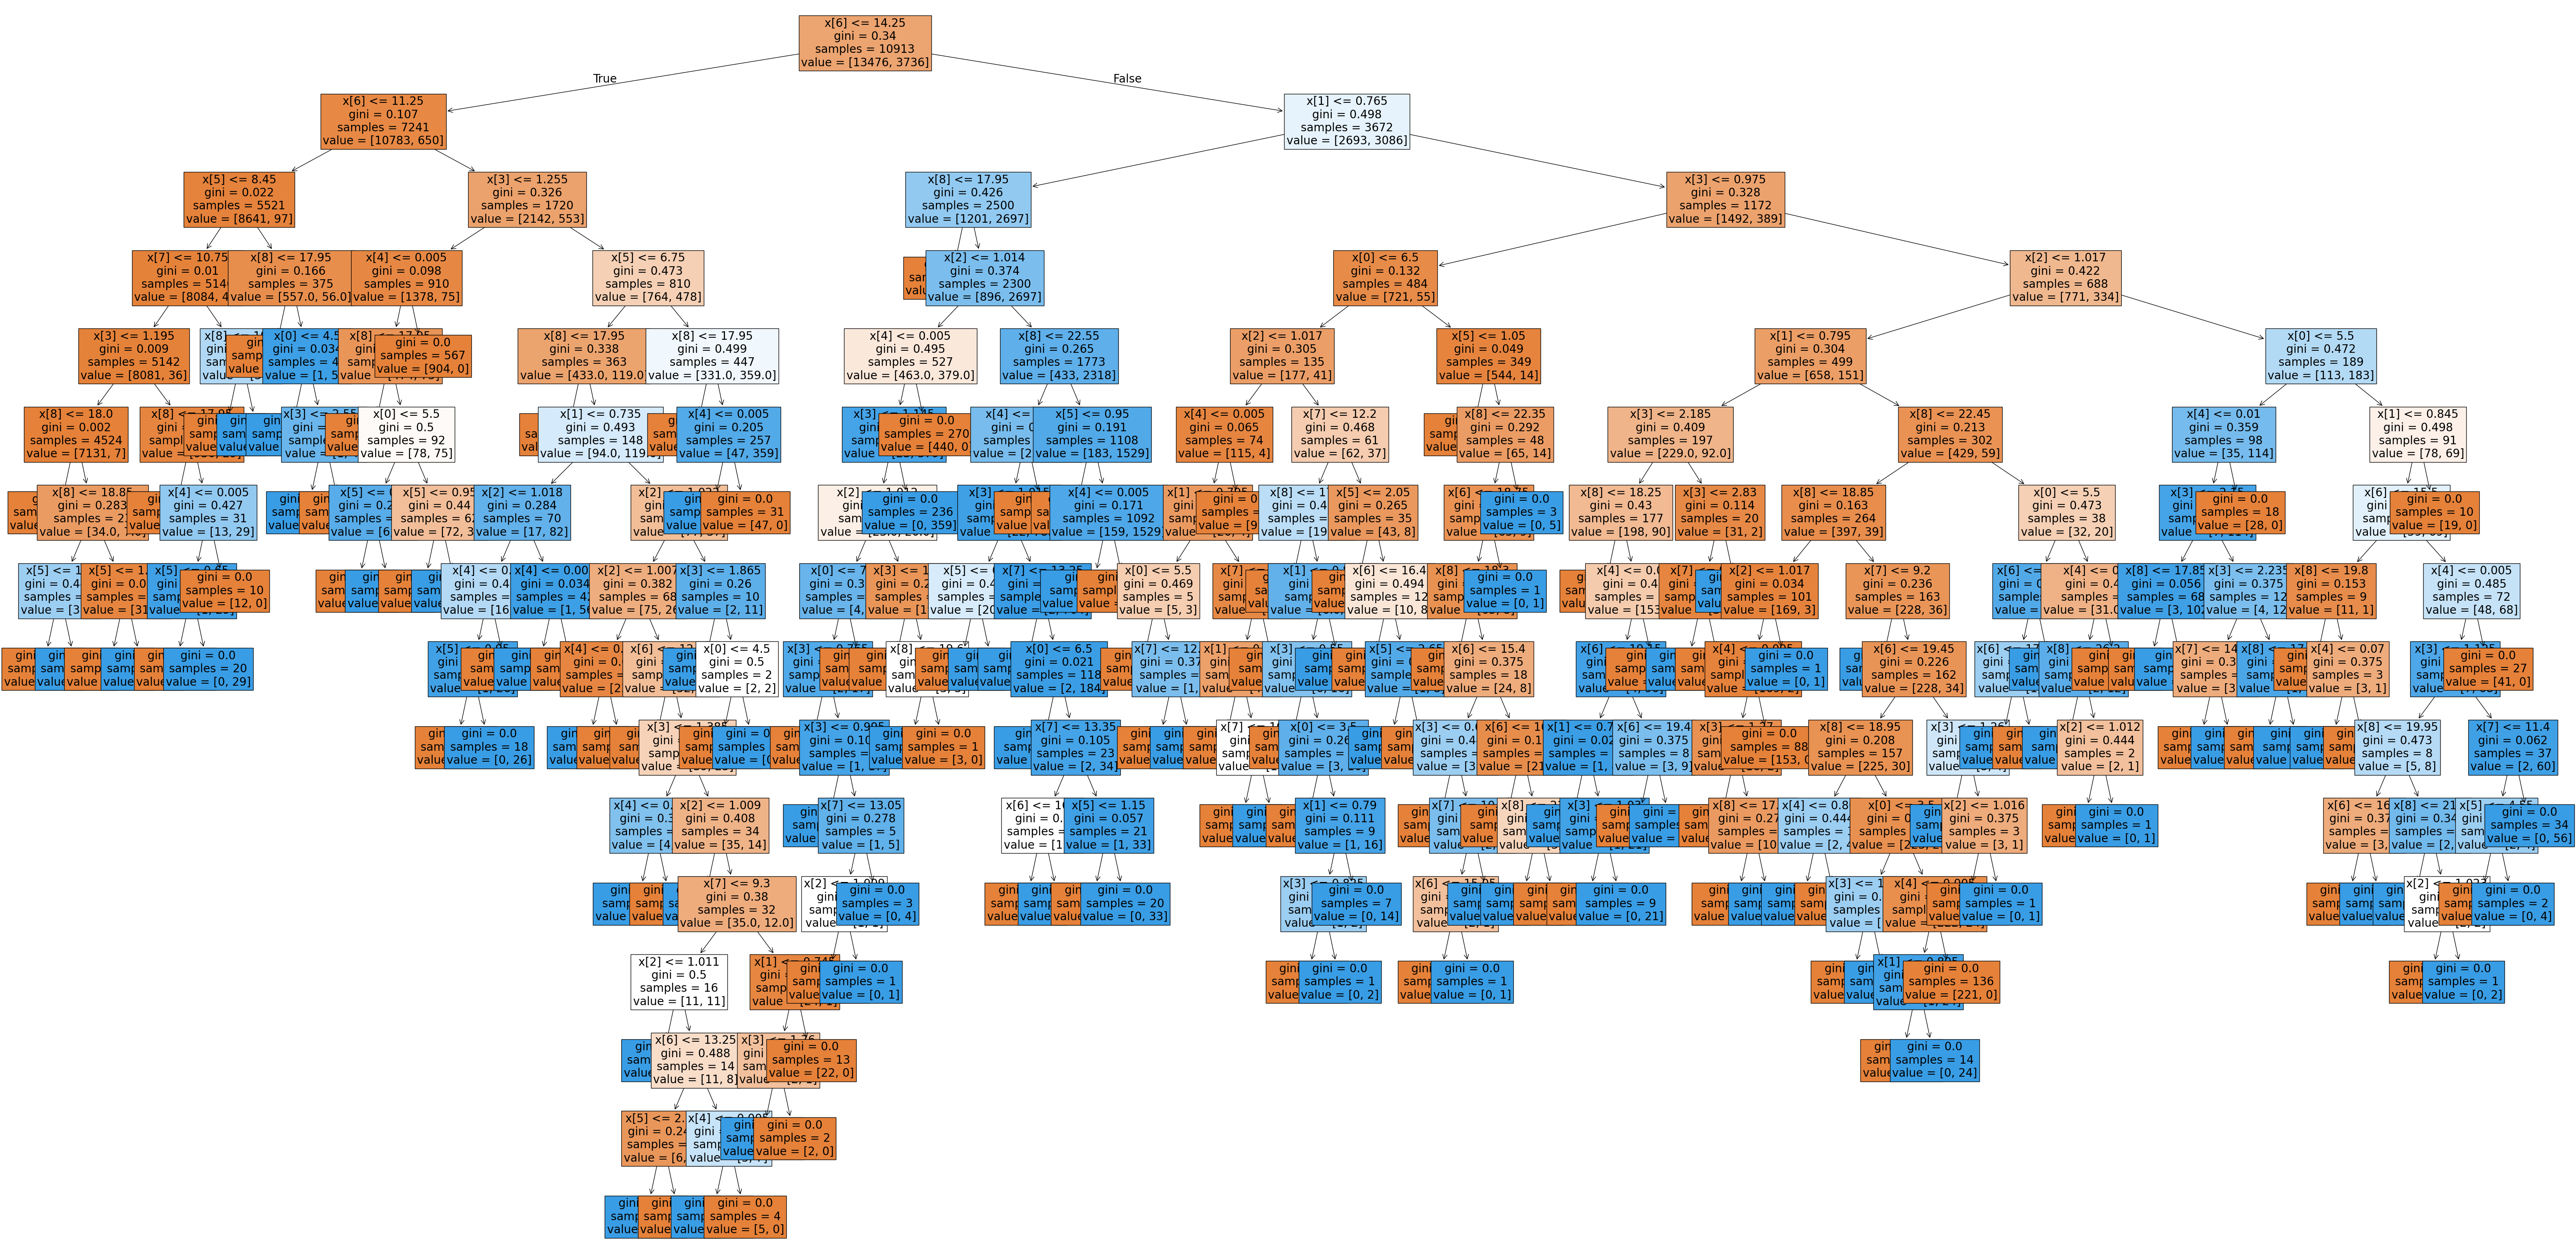

In [41]:
#Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

# Uncovering Feature Importance: Heathrow

In [44]:
#Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.01559253, 0.04348204, 0.02242557, 0.07299264, 0.29598395,
       0.07169155, 0.1172974 , 0.02179643, 0.33873787])

In [48]:
#Create a list of weather features

HEAT_list = [feature.replace('HEATHROW_', '') for feature in heathrow_list]
HEAT_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [50]:
important = pd.Series(newarray, index = HEAT_list)
important

cloud_cover         0.015593
humidity            0.043482
pressure            0.022426
global_radiation    0.072993
precipitation       0.295984
sunshine            0.071692
temp_mean           0.117297
temp_min            0.021796
temp_max            0.338738
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


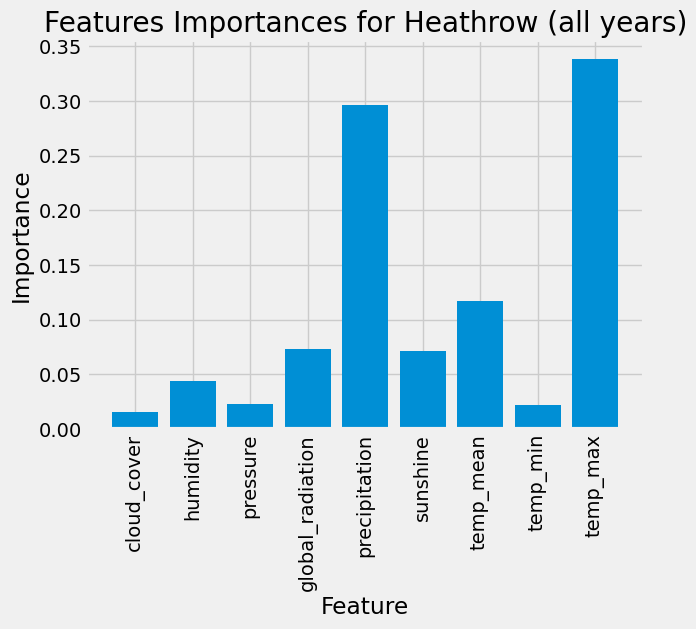

In [52]:
#Plot the results
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(HEAT_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, HEAT_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Heathrow (all years)');

plt.show()